In [441]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import comb

## Create graph

In [66]:
G = nx.Graph()
G.add_nodes_from(range(graph_size))

In [412]:
def get_bichromatic_ratio(g):
    bichromatic = 0
    for (x,y) in g.edges():
        if (x < size_maj) != (y < size_maj):
            bichromatic += 1
    return bichromatic / len(g.edges())

In [584]:
graph_size = 1000
maj_min_ratio = .5
size_maj = int(maj_min_ratio * graph_size)
size_min = int(graph_size - size_maj)
probs = [[0.05, 0.02],
         [0.02, 0.05]]
g = nx.generators.community.stochastic_block_model([size_maj, size_min], probs, seed=0)

In [585]:
def expected_bichromatic_wedges(n, p, q):
    return 2 * n * comb(n/2, 2) * p * q * (1-q)

In [566]:
def expected_monochromatic_wedges(n, p, q):
    return 3 * 2 * comb(n/2, 3) * p**2 * (1-p) + n * comb(n/2, 2) * q**2 * (1-p)

In [567]:
expected_bichromatic_wedges(graph_size, probs[0][0], probs[0][1])

592562.5

In [568]:
expected_monochromatic_wedges(graph_size, probs[0][0], probs[0][1])

591377.37500000012

In [569]:
expected_monochromatic_wedges(graph_size, probs[0][0], probs[0][1]) / (expected_monochromatic_wedges(graph_size, probs[0][0], probs[0][1]) + expected_bichromatic_wedges(graph_size, probs[0][0], probs[0][1]))

0.49949949949949962

In [570]:
bichromatic_ratios

array([ 0.16657037,  0.16657415,  0.16657661,  0.16657839,  0.16657951,
        0.16658394,  0.16659041,  0.16659419,  0.16660265,  0.16660846,
        0.16661424])

In [571]:
len(g.edges())

25160

In [572]:
iterations = 10
new_friends_per_iter = 1
alpha = 1

In [573]:
def get_group(node):
    if node < size_maj:
        return range(size_maj)
    else:
        return range(size_maj, graph_size)

In [574]:
len(g.nodes())

1000

In [575]:
def close_wedges(g, isalpha, alpha, iterations, new_friends_per_iter):
    bichromatic_ratios = [get_bichromatic_ratio(g)]
    for i in range(iterations):
        print("iteration", i)
        # Select random node
        node = np.random.randint(0, g.number_of_nodes())
        edges_added = 0
        # Add edges of friends of friends randomly
        while (edges_added < new_friends_per_iter):
            if isalpha:
                same_type = np.random.binomial(1, alpha)
                if same_type:
                    friends = set(nx.all_neighbors(g, node)).intersection(set(get_group(node)))
                else:
                    friends = set(nx.all_neighbors(g, node)).difference(set(get_group(node)))
            else:
                friends = set(nx.all_neighbors(g, node))
            if len(friends) > 0:
                friend = random.sample(friends, 1)[0]
                new_possible_friends = set(nx.all_neighbors(g, friend)).difference(set(nx.all_neighbors(g, node)))
                if len(new_possible_friends) > 0:
                    new_friend = random.sample(new_possible_friends, 1)[0]
                    g.add_edge(node, new_friend)
                    edges_added += 1
                else:
                    node = np.random.randint(0, g.number_of_nodes())
            else:
                node = np.random.randint(0, g.number_of_nodes())
        bichromatic_ratios.append(get_bichromatic_ratio(g))
    return bichromatic_ratios

In [586]:
sample_size = 50
bichromatic_ratio_matrix = []
for seed in range(sample_size):
    g = nx.generators.community.stochastic_block_model([size_maj, size_min], probs, seed=seed)
    bichromatic_ratio_matrix.append(close_wedges(g, False, alpha, iterations, new_friends_per_iter))

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 0
iteration 1
iteration 2
iter

In [587]:
bichromatic_ratios = np.average(bichromatic_ratio_matrix, axis=0)

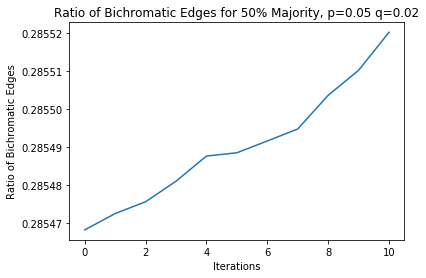

In [588]:
plt.plot(range(len(bichromatic_ratios)), bichromatic_ratios)
plt.xlabel("Iterations")
plt.ylabel("Ratio of Bichromatic Edges")
plt.title("Ratio of Bichromatic Edges for " + str(int(maj_min_ratio * 100)) + "% Majority, p=" +str(probs[0][0]) + " q=" + str(probs[0][1]))
# plt.savefig("plots/bichromatic_ratio_maj_" + str(int(maj_min_ratio * 100)) + "g" + str(graph_size) + "_iters" + str(iterations) + "_type_bias" + "_alpha" + str(int(10 * alpha)))
plt.savefig("plots/sbm_p=" + str(int(100*probs[0][0])) + "_q=" + str(int(100*probs[0][1])) + "biratio_maj_" + str(int(maj_min_ratio * 100)) + "g" + str(graph_size) + "_sample" + str(sample_size))
plt.show()

In [579]:
bichromatic_ratios

array([ 0.50045084,  0.50045081,  0.50044996,  0.50044838,  0.50044675,
        0.50044836,  0.50044672,  0.50044434,  0.50044194,  0.50044434,
        0.50044831])

In [589]:
nx.algorithms.centrality.degree_centrality(g)

{0: 0.03803803803803804,
 1: 0.03303303303303303,
 2: 0.03903903903903904,
 3: 0.03303303303303303,
 4: 0.036036036036036036,
 5: 0.028028028028028028,
 6: 0.031031031031031032,
 7: 0.04004004004004004,
 8: 0.036036036036036036,
 9: 0.03303303303303303,
 10: 0.03403403403403403,
 11: 0.03803803803803804,
 12: 0.03403403403403403,
 13: 0.036036036036036036,
 14: 0.037037037037037035,
 15: 0.02702702702702703,
 16: 0.026026026026026026,
 17: 0.03203203203203203,
 18: 0.035035035035035036,
 19: 0.03303303303303303,
 20: 0.03803803803803804,
 21: 0.03303303303303303,
 22: 0.02702702702702703,
 23: 0.03403403403403403,
 24: 0.03203203203203203,
 25: 0.03803803803803804,
 26: 0.036036036036036036,
 27: 0.036036036036036036,
 28: 0.037037037037037035,
 29: 0.03403403403403403,
 30: 0.036036036036036036,
 31: 0.03203203203203203,
 32: 0.03203203203203203,
 33: 0.035035035035035036,
 34: 0.03303303303303303,
 35: 0.044044044044044044,
 36: 0.05105105105105105,
 37: 0.04004004004004004,
 38: 0.0